In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### prepare the pickle file

In [5]:
EXPERIMENT_NAME = 'P3856'

In [2]:
identifications_df = pd.read_pickle('~/all_identified_features.pkl')

In [3]:
identifications_df.columns

Index(['file_idx', 'scan', 'charge_x', 'spectrum precursor m/z',
       'spectrum neutral mass', 'peptide mass', 'percolator score',
       'percolator q-value', 'percolator PEP', 'total matches/spectrum',
       'sequence', 'protein id', 'flanking aa', 'feature_id', 'charge_y',
       'rt_apex', 'rt_peak_width', 'scan_apex', 'scan_peak_width', 'intensity',
       'precursor_id', 'monoisotopic_mass', 'predicted_mass_error',
       'recalibrated_monoisotopic_mass', 'recalibrated_monoisotopic_mz',
       'percolator_idx', 'human'],
      dtype='object')

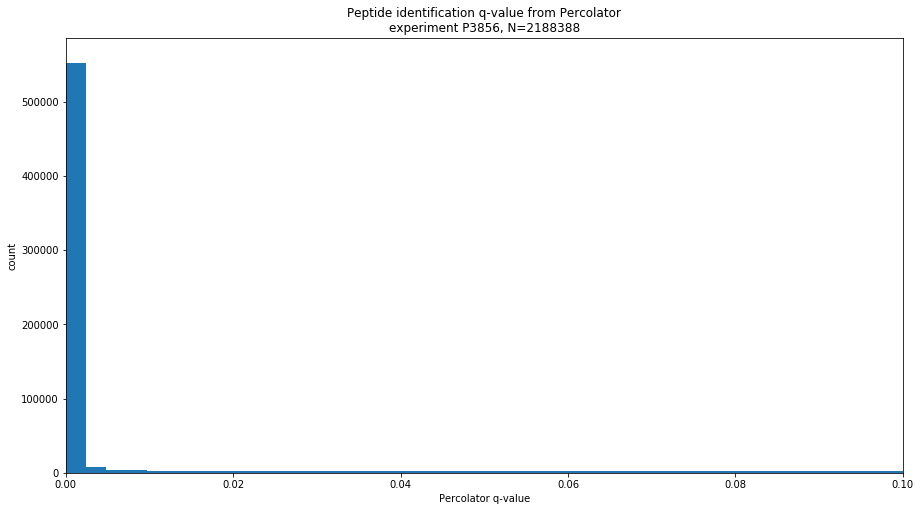

In [9]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

bins = 300
values = identifications_df['percolator q-value']
y, x, _ = ax1.hist(values, bins=bins)
mean = np.mean(values)
# ax1.axvline(mean, color='darkorange', lw=1.0, ls='-.', label='mean')

plt.xlabel('Percolator q-value')
plt.ylabel('count')
plt.title('Peptide identification q-value from Percolator\nexperiment {}, N={}'.format(EXPERIMENT_NAME,len(identifications_df)))
plt.xlim((0,0.1))
# plt.ylim((0,1000))

plt.show()

In [7]:
identifications_df['percolator q-value'].min()

3.817231e-06

In [8]:
identifications_df.sample(n=10)

,file_idx,scan,charge_x,spectrum precursor m/z,spectrum neutral mass,peptide mass,percolator score,percolator q-value,percolator PEP,total matches/spectrum,...,scan_apex,scan_peak_width,intensity,precursor_id,monoisotopic_mass,predicted_mass_error,recalibrated_monoisotopic_mass,recalibrated_monoisotopic_mz,percolator_idx,human
1658714,24,3997802,2,930.4847,1858.9548,1859.9563,-0.592933,0.625729,9.866296e-01,663.613,...,158.03,75.00,6834.00000,39978,1859.952448,-0.009620,1859.962069,930.988310,24,True
1335138,0,313501,2,587.8128,1173.6111,1174.6193,-0.487610,0.539946,9.743286e-01,663.613,...,826.83,50.01,74805.00000,3135,1174.614978,-0.003421,1174.618399,588.316475,0,True
325775,29,5125401,3,574.3109,1719.9109,1720.9182,0.710087,0.000015,5.481080e-05,663.613,...,869.72,25.58,15049.00000,51254,1720.921056,0.002916,1720.918140,574.646656,29,True
1299240,2,1868001,2,756.8754,1511.7362,1512.7393,-0.476880,0.527894,9.718845e-01,663.613,...,479.56,33.71,81056.00000,18680,1512.741262,-0.002260,1512.743522,757.379037,2,True
965529,16,3282201,2,750.3897,1498.7648,1499.7692,-0.372340,0.376846,9.584746e-01,663.613,...,568.33,133.10,146138.00000,32822,1499.766539,-0.005492,1499.772031,750.893292,16,True
99735,0,1593701,2,1097.9900,2193.9654,2194.9726,1.161837,0.000004,3.465418e-07,663.613,...,212.64,75.00,225509.00000,15937,2194.968682,-0.004039,2194.972722,1098.493637,0,True
224029,2,1050001,3,560.2786,1677.8141,1678.8215,0.894809,0.000004,6.922115e-06,663.613,...,893.66,34.09,25390.00000,10500,1678.821591,0.000195,1678.821395,560.614408,2,True
1302278,29,4722302,1,1059.4698,1058.4625,1059.4655,-0.477798,0.528993,9.720992e-01,663.613,...,116.87,75.00,8363.63589,47223,1059.468251,-0.001506,1059.469756,1060.477032,29,True
1850111,6,3898301,2,808.8816,1615.7486,1559.7362,-0.677399,0.664373,1.000000e+00,663.613,...,468.27,32.42,120581.00000,38983,1616.751421,-0.004413,1616.755834,809.385193,6,True
582174,8,3614101,2,687.3639,1372.7132,1373.7224,-0.065698,0.020629,6.263946e-01,663.613,...,637.41,29.61,77796.00000,36141,1373.713703,-0.006787,1373.720490,687.867521,8,True


In [ ]:
sequences_l = []
for group_name,group_df in identifications_df.groupby(['sequence','charge_x'], as_index=False):
    sequence = group_name[0]
    charge = group_name[1]
    q_value = group_df['percolator q-value'].mean()
    sequences_l.append((sequence,charge,q_value))

In [12]:
sequences_df = pd.DataFrame(sequences_l, columns=['sequence','charge','q_value'])

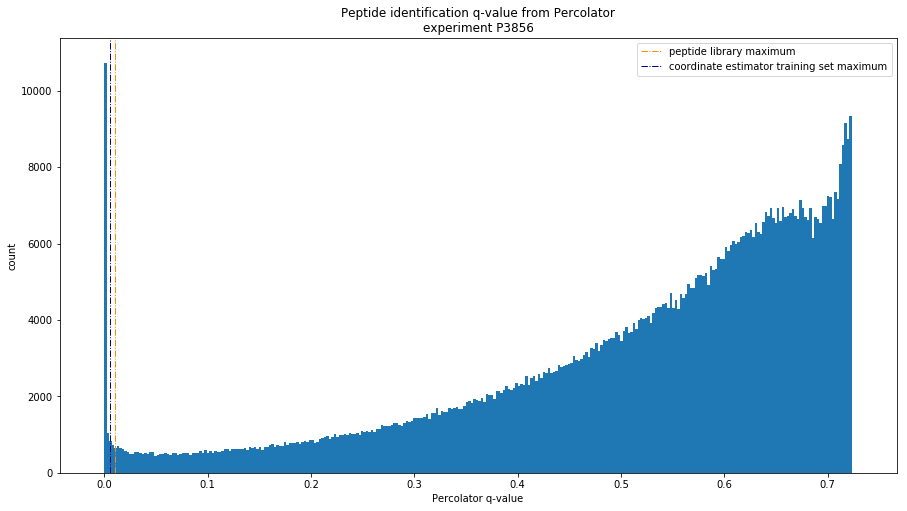

In [27]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

bins = 300
# values = sequences_df[sequences_df.q_value <= 0.05].q_value
values = sequences_df.q_value
y, x, _ = ax1.hist(values, bins=bins, label=None)

ax1.axvline(0.01, color='darkorange', lw=1.0, ls='-.', label='peptide library maximum')
ax1.axvline(0.005, color='darkblue', lw=1.0, ls='-.', label='coordinate estimator training set maximum')

plt.xlabel('Percolator q-value')
plt.ylabel('count')
plt.title('Peptide identification q-value from Percolator\nexperiment {}'.format(EXPERIMENT_NAME))
# plt.xlim((0,0.01))
# plt.ylim((0,1000))

plt.legend(loc='best')

plt.show()